In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, layers
from keras.models import Sequential
from keras.layers import Dense
import os
import glob
from glob import glob
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

data_dir = os.chdir(r'C:\Users\admin\OneDrive\바탕 화면\code\dataset\image\sample2_cw')
data_list = glob('*.jpg')
batch_size = len(data_list)

label = []
images = np.zeros((batch_size, 100, 100, 3))

for n, path in enumerate(data_list[:batch_size]):
    # lable 
    token = text_to_word_sequence(data_list[n])
    label.append(token[0])
    image = cv2.imread(data_list[n])
    image = cv2.resize(image, (100, 100))/255
    images[n, :, :, :] =image

##image = image.reshape(-1,256*256*3)/255

images=images.reshape(-1,100*100*3)
print(images.shape)
label = np.array(label)
items = label
encoder = LabelEncoder()
encoder.fit(items)
label = encoder.transform(items)

##pca = PCA(n_components=50)
##pca_result = pca.fit_transform(images)

(2000, 30000)


In [3]:
tsneNDArray = TSNE(n_components = 2, init = "pca", random_state = 0, perplexity = 50).fit_transform(images)

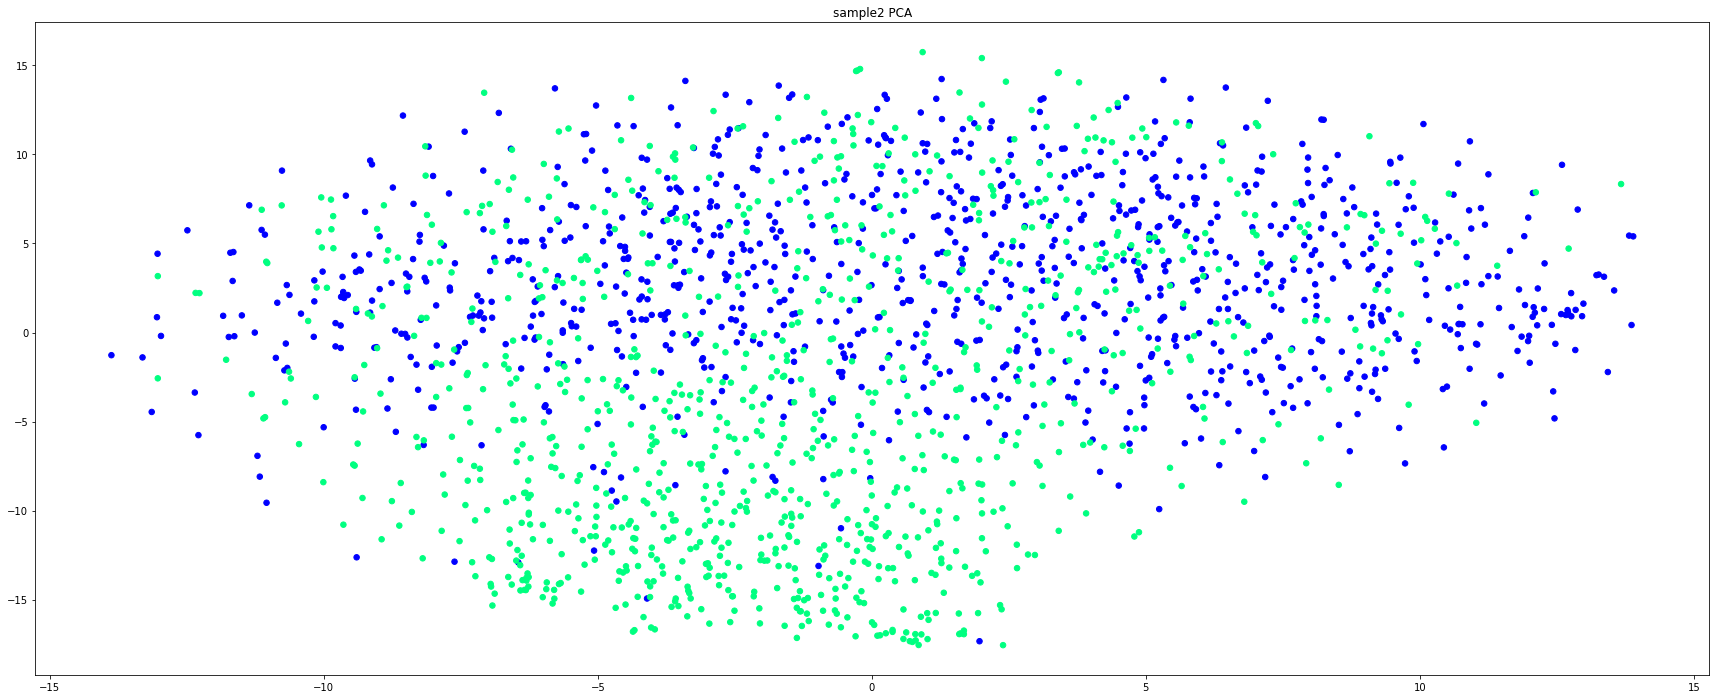

In [9]:
fig, ax = plt.subplots() 
ax.scatter(tsneNDArray[:, 0], tsneNDArray[:, 1], c = label, s= 30, cmap='winter') 
plt.title('sample2 PCA')
plt.rcParams["figure.figsize"] = (30,15)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(tsneNDArray,label,test_size=0.3,random_state=1004)

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[251  41]
 [121 187]]
              precision    recall  f1-score   support

           0       0.67      0.86      0.76       292
           1       0.82      0.61      0.70       308

    accuracy                           0.73       600
   macro avg       0.75      0.73      0.73       600
weighted avg       0.75      0.73      0.73       600



cf_matrix:[[251  41]
 [121 187]]


<AxesSubplot:>

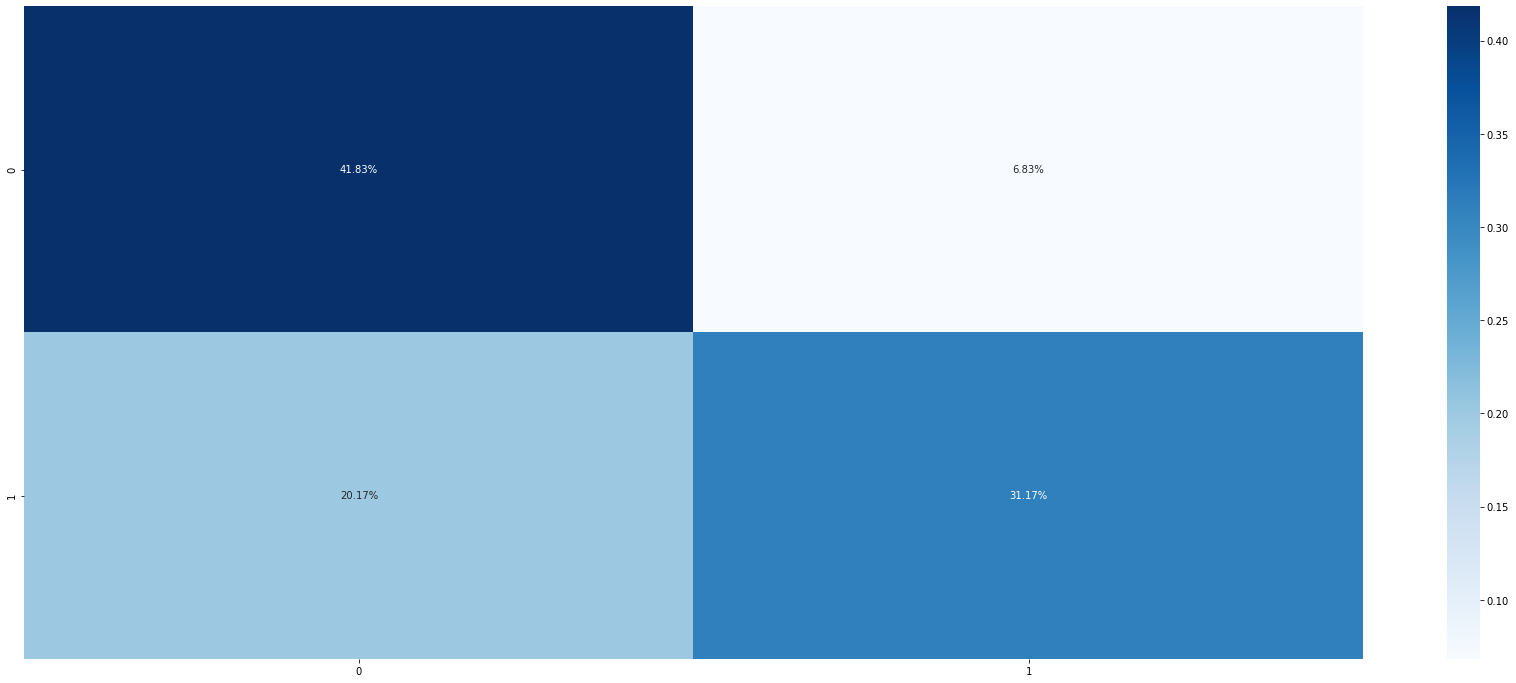

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print('cf_matrix:' + str(cf_matrix))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt = '.2%', cmap='Blues')